# Analyse SQL - Base Chinook

Ce notebook présente une analyse simple de la base relationnelle Chinook (ventes musicales).  
Objectifs :
- Explorer les tables
- Réaliser quelques requêtes SQL
- Visualiser les résultats

In [61]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

chinook = sqlite3.connect("Chinook_Sqlite.sqlite")


## Explorer la base

On commence par lister toutes les tables disponibles dans la base Chinook.


In [64]:
sql_tables = """
SELECT name 
FROM sqlite_master 
WHERE type='table';
"""
tables = pd.read_sql(sql_tables, chinook)
tables


,name
0,Album
1,Artist
2,Customer
3,Employee
4,Genre
5,Invoice
6,InvoiceLine
7,MediaType
8,Playlist
9,PlaylistTrack


- **SELECT name** -affiche la colonne name
- **FROM sqlite_master** - table interne qui liste toutes les tables de la base.  
- **WHERE type='table'** - on filtre pour garder seulement les tables.  
 Résultat : Sors une liste avec les noms de toutes les tables de la base de Chinook.

## Cas 1 : Top 5 artistes les plus vendus

On regarde quels artistes ont le plus de ventes (en nombre de morceaux vendus).



In [70]:
cas_artistes = """
SELECT ar.Name AS Artist, SUM(il.Quantity) AS TotalSales
FROM InvoiceLine il
JOIN Track t ON il.TrackId = t.TrackId
JOIN Album al ON t.AlbumId = al.AlbumId
JOIN Artist ar ON al.ArtistId = ar.ArtistId
GROUP BY ar.Name
ORDER BY TotalSales DESC
LIMIT 5;
"""
top_artistes = pd.read_sql(cas_artistes, chinook)
top_artistes



,Artist,TotalSales
0,Iron Maiden,140
1,U2,107
2,Metallica,91
3,Led Zeppelin,87
4,Os Paralamas Do Sucesso,45


- **SELECT ar.Name** - on récupère le nom de l’artiste.  
- **SUM(il.Quantity)** - on additionne toutes les ventes pour chaque artiste.  
- **FROM InvoiceLine** - on part des lignes de factures (chaque morceau vendu).  
- **JOIN Track / Album / Artist** - on relie ventes ,morceaux ,albums et artistes.  
- **GROUP BY ar.Name** - on regroupe toutes les ventes par artiste.  
- **ORDER BY TotalSales DESC** - on trie du plus vendu au moins vendu.  
- **LIMIT 5** - on garde seulement les 5 premiers.  
 Résultat : On ressort un tableau avec le top 5 des artistes et leur nombre de vente.


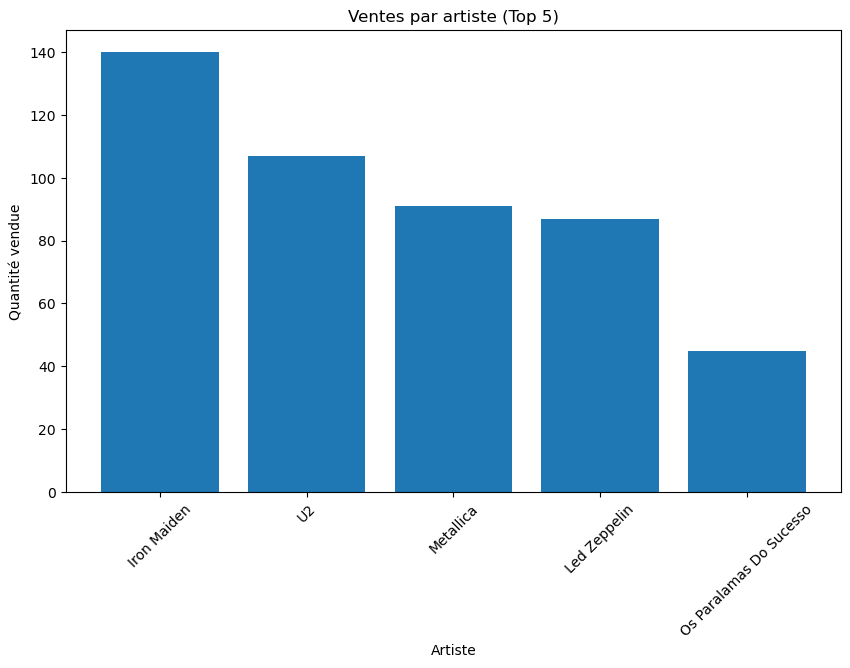

In [75]:
# Graphique : ventes par artiste (Top 5)
plt.figure(figsize=(10,6))
plt.bar(top_artistes["Artist"], top_artistes["TotalSales"])
plt.title("Ventes par artiste (Top 5)")
plt.xlabel("Artiste")
plt.ylabel("Quantité vendue")
plt.xticks(rotation=45)
plt.show()


## Cas 2 : Revenu total par pays

On calcule combien chaque pays a rapporté en termes de chiffre d'affaires.


In [85]:
cas_pays = """
SELECT BillingCountry, SUM(Total) AS Revenue
FROM Invoice
GROUP BY BillingCountry
ORDER BY Revenue DESC
LIMIT 10;
"""
revenu_pays = pd.read_sql(cas_pays, chinook)
revenu_pays



,BillingCountry,Revenue
0,USA,523.06
1,Canada,303.96
2,France,195.10
3,Brazil,190.10
4,Germany,156.48
5,United Kingdom,112.86
6,Czech Republic,90.24
7,Portugal,77.24
8,India,75.26
9,Chile,46.62


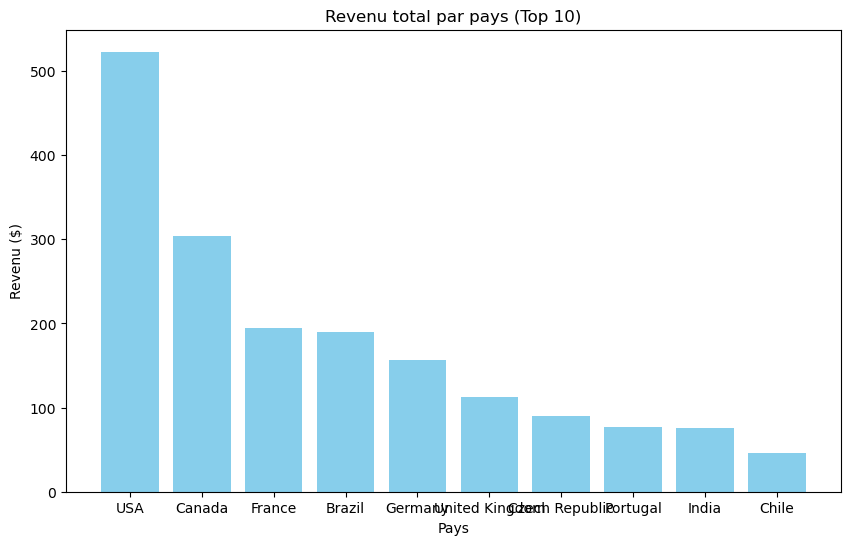

In [38]:
## Graphique : revenu total par pays
plt.figure(figsize=(10,6))
plt.bar(revenue_country["BillingCountry"], revenue_country["Revenue"], color="skyblue")
plt.title("Revenu total par pays (Top 10)")
plt.xlabel("Pays")
plt.ylabel("Revenu ($)")
plt.show()


## Cas 3 : Durée moyenne des morceaux par genre

On calcule la durée moyenne (en minutes) des morceaux pour chaque genre musical.


In [78]:
cas_genre = """
SELECT g.Name AS Genre, AVG(t.Milliseconds)/60000 AS AvgDurationMinutes
FROM Track t
JOIN Genre g ON t.GenreId = g.GenreId
GROUP BY g.Name
ORDER BY AvgDurationMinutes DESC
LIMIT 10;
"""
duree_genre = pd.read_sql(cas_genre, chinook)
duree_genre


,Genre,AvgDurationMinutes
0,Sci Fi & Fantasy,48.529717
1,Science Fiction,43.759151
2,Drama,42.921396
3,TV Shows,35.750684
4,Comedy,26.421062
5,Metal,5.162491
6,Electronica/Dance,5.049763
7,Heavy Metal,4.957549
8,Classical,4.897793
9,Jazz,4.862590


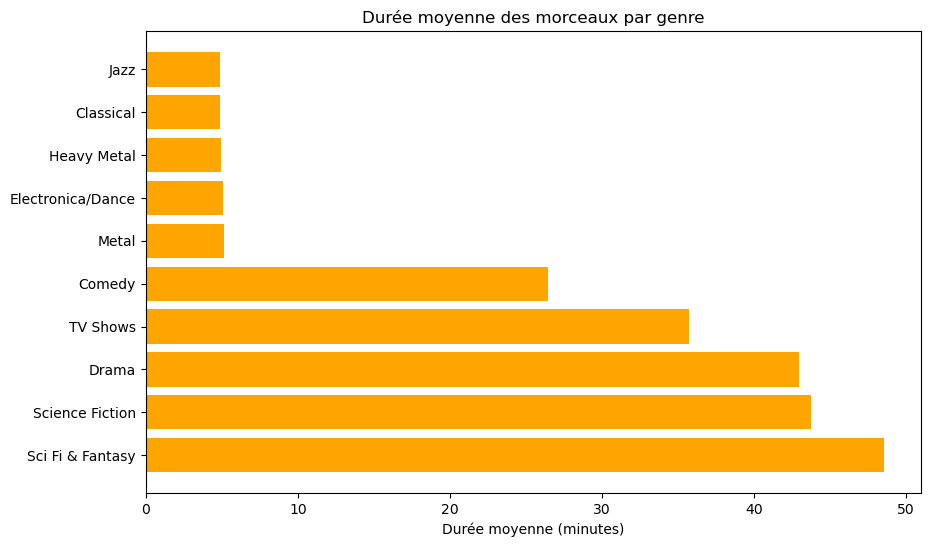

In [40]:
## Graphique : Durée moyenne des morceaux par genre
plt.figure(figsize=(10,6))
plt.barh(avg_duration["Genre"], avg_duration["AvgDurationMinutes"], color="orange")
plt.xlabel("Durée moyenne (minutes)")
plt.title("Durée moyenne des morceaux par genre")
plt.show()


## Fin de l'analyse

On ferme la connexion à la base de données.



In [81]:
conn.close()
